In [ ]:
# Compare flows before and after period of most significant river engineering
# update relevant year in line...
# also calculate month of max and min flows before and after, as well as summary statistics

In [1]:
import HydroErr as he
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')
import seaborn as sns
from seaborn_qqplot import pplot
from glob import glob
import os
import re
from datetime import datetime
#from scipy import signal

In [2]:
# specify the directories that the datasets to be compared are saved in.
#dir= '/Volumes/MCO_SSD/data/ObservedData/USACE/USACE_MS_TarburtLanding_daily_19302021.csv'
dir= '/Volumes/MCO_SSD/data/ObservedData/USGS/monthly/monthlymean/monthlymeanUSGS_AR_LittleRock_daily_19271970.csv'
#dir= '/Volumes/MCO_SSD/data/ObservedData/USGS/monthly/monthlymean/monthlymeanUSGS_MO_Hermann_daily_19282021.csv'
#dir= '/Volumes/MCO_SSD/data/ObservedData/USGS/monthly/monthlymean/monthlymeanUSGS_MS_StLouis_daily_18612021.csv'
#dir= '/Volumes/MCO_SSD/data/ObservedData/USGS/monthly/monthlymean/monthlymeanUSGS_OH_Louisville_daily_19282021.csv'


In [3]:
#df = pd.read_csv(dir, sep=",", header = 0) # use with tarburt landing df
df = pd.read_csv(dir, sep=",", header = 0)

In [4]:
df

,month,year,QCHANR,site_no,datetime
0,1,1928,37522.580645,7263500,1928-01-01
1,1,1929,66629.032258,7263500,1929-01-01
2,1,1930,41825.806452,7263500,1930-01-01
3,1,1931,7683.870968,7263500,1931-01-01
4,1,1932,126451.612903,7263500,1932-01-01
...,...,...,...,...,...
511,12,1965,6096.451613,7263500,1965-12-01
512,12,1966,5380.645161,7263500,1966-12-01
513,12,1967,43032.258065,7263500,1967-12-01
514,12,1968,71180.645161,7263500,1968-12-01


In [5]:
#df['year_category'] = df['year'].apply(lambda x: 'Before 1970' if x < 1970 else 'After 1970')

In [6]:
#df

In [7]:
df['QCHANR'] = pd.to_numeric(df['QCHANR'])

In [8]:
df.groupby(['year', 'month'])['QCHANR'].mean().reset_index()

,year,month,QCHANR
0,1927,10,84003.225806
1,1927,11,23830.000000
2,1927,12,45803.225806
3,1928,1,37522.580645
4,1928,2,33593.103448
...,...,...,...
511,1970,5,99987.096774
512,1970,6,49920.000000
513,1970,7,16939.354839
514,1970,8,8290.645161


In [9]:
df['year_category'] = df['year'].apply(lambda x: 'Before 1970' if x < 1970 else 'After 1970')

In [10]:
df

,month,year,QCHANR,site_no,datetime,year_category
0,1,1928,37522.580645,7263500,1928-01-01,Before 1970
1,1,1929,66629.032258,7263500,1929-01-01,Before 1970
2,1,1930,41825.806452,7263500,1930-01-01,Before 1970
3,1,1931,7683.870968,7263500,1931-01-01,Before 1970
4,1,1932,126451.612903,7263500,1932-01-01,Before 1970
...,...,...,...,...,...,...
511,12,1965,6096.451613,7263500,1965-12-01,Before 1970
512,12,1966,5380.645161,7263500,1966-12-01,Before 1970
513,12,1967,43032.258065,7263500,1967-12-01,Before 1970
514,12,1968,71180.645161,7263500,1968-12-01,Before 1970


In [11]:
#sns.lineplot(data=df, x='month', y='QCHANR', hue='year_category')

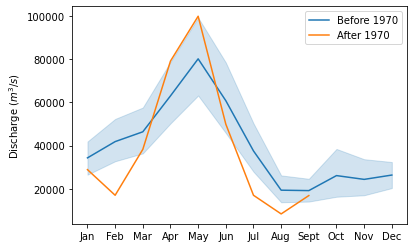

In [12]:
# Define the order of months in text
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# Create the line plot
sns.lineplot(data=df, x='month', y='QCHANR', hue='year_category')

# Set the x-axis labels to months in text
plt.xticks(ticks=df['month'].unique(), labels=months_order)

# Set the y-axis label
plt.ylabel('Discharge ($m^3/s$)')

# Remove the legend title
plt.legend(title='')

# Remove the x-axis title
plt.xlabel('')

# Show the plot
#plt.savefig(f'/Volumes/MCO_SSD/data/plots/validation_paper/prepostdam_plot_UpperMississippi.png', dpi=300, bbox_inches='tight')
plt.show()

In [144]:
# Set float formatting
pd.options.display.float_format = '{:.2f}'.format

# Calculate summary statistics
summary_stats = df['QCHANR'].describe()

In [145]:
# overall summary stats
summary_stats

count      516.00
mean     39841.55
std      41741.75
min       1141.29
25%      12312.42
50%      25838.86
75%      51696.83
max     290267.74
Name: QCHANR, dtype: float64

In [146]:
# Find the month of the peak QCHANR value for each year category
peak_months = df.groupby(['year_category', 'month'])['QCHANR'].mean().reset_index()
month_max = peak_months.groupby('year_category')['QCHANR'].idxmax().map(peak_months['month'])

# Print the results
print("Month of Peak QCHANR Value for Each Year Category:")
#print(peak_months)
print(month_max)

Month of Peak QCHANR Value for Each Year Category:
year_category
After 1970     5
Before 1970    5
Name: QCHANR, dtype: int64


In [147]:
# Find the month of the peak QCHANR value for each year category
peak_months = df.groupby(['year_category', 'month'])['QCHANR'].mean().reset_index()
month_min = peak_months.groupby('year_category')['QCHANR'].idxmin().map(peak_months['month'])

# Print the results
print("Month of Min QCHANR Value for Each Year Category:")
#print(peak_months)
print(month_min)

Month of Min QCHANR Value for Each Year Category:
year_category
After 1970     8
Before 1970    9
Name: QCHANR, dtype: int64


In [193]:
# Calculate summary statistics grouped by year_category
grouped_summary = df.groupby('year_category')['QCHANR'].describe()

# Print the summary statistics grouped by year_category
print("\nSummary Statistics of QCHANR Grouped by year_category:")
print(grouped_summary)


Summary Statistics of QCHANR Grouped by year_category:
                 count      mean       std       min       25%       50%  \
year_category                                                              
After 1980    14956.00 548065.89 291351.22 111000.00 306000.00 482000.00   
Before 1980   18262.00 458796.30 282338.22  75000.00 229000.00 373000.00   

                    75%        max  
year_category                       
After 1980    744000.00 1619000.00  
Before 1980   640000.00 1520000.00  
